In [523]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### First Glance At Data

In [524]:
# Reading the data
data=pd.read_csv('track_data_final.csv')

In [525]:
## First glance to the data
data.head()

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,267013,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album


In [526]:
## Checking all the column names
data.columns

Index(['track_id', 'track_name', 'track_number', 'track_popularity',
       'track_duration_ms', 'explicit', 'artist_name', 'artist_popularity',
       'artist_followers', 'artist_genres', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_type'],
      dtype='object')

## Handling Missing Values

In [527]:
## Checking total number of null values
data.isnull().sum()

track_id              0
track_name            2
track_number          0
track_popularity      0
track_duration_ms     0
explicit              0
artist_name           4
artist_popularity     4
artist_followers      4
artist_genres         4
album_id              0
album_name            2
album_release_date    0
album_total_tracks    0
album_type            0
dtype: int64

In [528]:
## Checking total number of null values columnwise to check overall percentage of the nulls
missing_track_name = data['track_name'].isnull().sum()
missing_artist_name = data['artist_name'].isnull().sum()
missing_artist_popularity = data['artist_popularity'].isnull().sum()
missing_artist_followers = data['artist_followers'].isnull().sum()
missing_artist_genres = data['artist_genres'].isnull().sum()
missing_album_name = data['album_name'].isnull().sum()


total_rows = len(data)

## Calculates Percentage Of Nulls
percentage_track_name = (missing_track_name / total_rows) * 100
percentage_artist_name = (missing_artist_name / total_rows) * 100
percentage_artist_popularity = (missing_artist_popularity / total_rows) * 100
percentage_artist_followers = (missing_artist_followers / total_rows) * 100
percentage_artist_genres = (missing_artist_genres / total_rows) * 100
percentage_album_name = (missing_album_name / total_rows) * 100

## Dsiplays the total percentage of nulls
print(f"Missing values in 'track_name': {missing_track_name} ({percentage_track_name:.2f}%)")
print(f"Missing values in 'artist_name': {missing_artist_name} ({percentage_artist_name:.2f}%)")
print(f"Missing values in 'artist_popularity': {missing_artist_popularity} ({percentage_artist_popularity:.2f}%)")
print(f"Missing values in 'artist_followers': {missing_artist_followers} ({percentage_artist_followers:.2f}%)")
print(f"Missing values in 'artist_genres': {missing_artist_genres} ({percentage_artist_genres:.2f}%)")
print(f"Missing values in 'album_name': {missing_album_name} ({percentage_album_name:.2f}%)")

Missing values in 'track_name': 2 (0.02%)
Missing values in 'artist_name': 4 (0.05%)
Missing values in 'artist_popularity': 4 (0.05%)
Missing values in 'artist_followers': 4 (0.05%)
Missing values in 'artist_genres': 4 (0.05%)
Missing values in 'album_name': 2 (0.02%)


In [529]:
## Dropping The Null Values 
data.dropna(inplace=True)
print(data.isnull().sum())

track_id              0
track_name            0
track_number          0
track_popularity      0
track_duration_ms     0
explicit              0
artist_name           0
artist_popularity     0
artist_followers      0
artist_genres         0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_type            0
dtype: int64


## Fixing Data Discrepancies

In [530]:
## Getting an overall overview of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8772 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8772 non-null   object 
 1   track_name          8772 non-null   object 
 2   track_number        8772 non-null   int64  
 3   track_popularity    8772 non-null   int64  
 4   track_duration_ms   8772 non-null   int64  
 5   explicit            8772 non-null   bool   
 6   artist_name         8772 non-null   object 
 7   artist_popularity   8772 non-null   float64
 8   artist_followers    8772 non-null   float64
 9   artist_genres       8772 non-null   object 
 10  album_id            8772 non-null   object 
 11  album_name          8772 non-null   object 
 12  album_release_date  8772 non-null   object 
 13  album_total_tracks  8772 non-null   int64  
 14  album_type          8772 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usage: 1.

In [531]:
## Converting album_release_date from object(string) to datetime 
data['album_release_date'] = pd.to_datetime(data['album_release_date'], format='mixed', errors='coerce')

In [532]:
## Converting track duration from miliseconds to minutes 
data['duration_min'] = data['track_duration_ms'] / 60000

In [536]:
## Checking unique values in the artist_genres as it had [] in the column , are there any other discrepancies
data['artist_genres'].unique()

array(['pop', 'stutter house', 'unknown', 'dream pop',
       'brazilian bass, electronic, slap house, electro house',
       'soft pop', 'uk drill, drill, uk grime, grime', 'edm, electronic',
       'hip hop, west coast hip hop', 'emo rap, cloud rap',
       'nu metal, rap metal, rock, alternative metal', 'bedroom pop',
       'folk pop', 'latin pop', 'soundtrack', 'ambient folk',
       'blues rock, garage rock, modern blues, rock', 'metal, hard rock',
       'country, acoustic country',
       'reggaeton, trap latino, urbano latino, latin',
       'egyptian hip hop, arabic hip hop, egyptian pop, mahraganat',
       'country, classic country',
       'honky tonk, classic country, traditional country',
       'reggaeton, urbano latino', 'k-pop', 'country',
       'country, pop country, acoustic country', 'dark r&b, trap soul',
       'german hip hop', 'soundtrack, medieval',
       'proto-punk, baroque pop', 'soft pop, acoustic pop',
       'rap, hip hop', 'r&b', 'dark r&b', 'indie fo

In [534]:
## Replacing empty [] with unknown and '[' and ']' with ''
data['artist_genres'] = data['artist_genres'].apply(
    lambda x: x.replace("'", "").replace("[]", "unknown").replace("[", "").replace("]", "")
)


In [395]:
## Checking for unique values in explicit columns
data.explicit.unique()

array([False,  True])

In [585]:
### Mapping explicit column to Explicit/Non-Explicit
data.explicit=data.explicit.map({True: 'Explicit', False: 'Non-Explicit'})

## Analysis By Artists 

In [586]:
## Calculating Artist With Most Releases (Top 10)
artist_with_most_releases=data.artist_name.value_counts().head(10)
print(f"Top 5 artists with most releases")
print("-"*30)
print(f"{'artist':<15}  {'releases'}")
print("-"*30)
for artist,releases in artist_with_most_releases.items():
  print(f"{artist:<15} : {releases}")

Top 5 artists with most releases
------------------------------
artist           releases
------------------------------
Taylor Swift    : 330
The Weeknd      : 151
Ariana Grande   : 101
Lana Del Rey    : 99
Nirvana         : 91
Drake           : 86
Post Malone     : 83
The Neighbourhood : 77
Lady Gaga       : 72
Olivia Rodrigo  : 70


Text(0, 0.5, '')

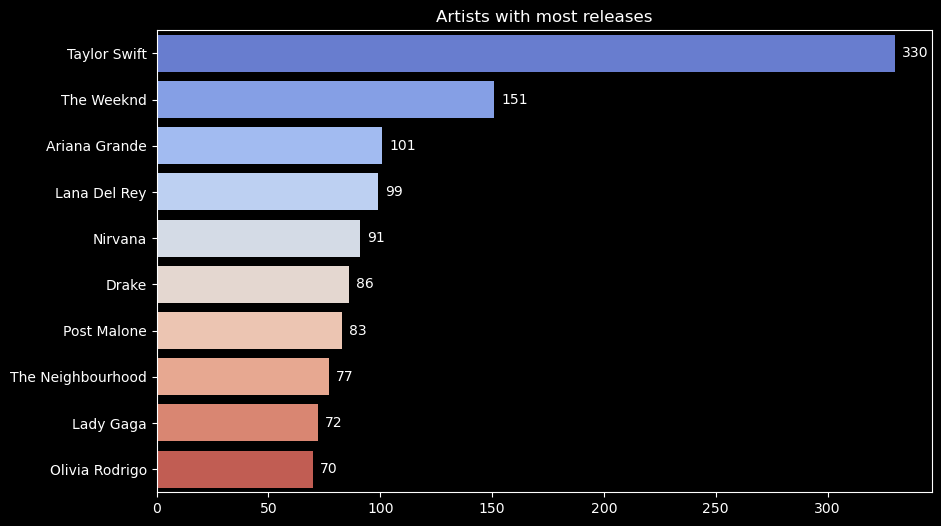

In [587]:
## Visualizing artists with most releases
plt.figure(figsize=(10,6))
cn=sns.barplot(x=artist_with_most_releases.values,y=artist_with_most_releases.index,palette='coolwarm')
for container in cn.containers:
  cn.bar_label(container,padding=5)
plt.title('Artists with most releases')
plt.xlabel('')
plt.ylabel('')

In [588]:
## Calculating Artist Popularity (Top 10)
most_popular_artist = data.groupby('artist_name')['artist_popularity'].mean().round(2).sort_values(ascending=False).head(10)

print("Top 10 most popular artists are:")
print("-" * 35)
print(f"{'artist':<20} {'popularity'}")
print("-" * 35)

for artist, popularity in most_popular_artist.items():
    print(f"{artist:<20}: {popularity:.2f}")

Top 10 most popular artists are:
-----------------------------------
artist               popularity
-----------------------------------
Taylor Swift        : 100.00
Drake               : 95.00
Bad Bunny           : 95.00
The Weeknd          : 93.32
Justin Bieber       : 91.00
Sabrina Carpenter   : 91.00
Ariana Grande       : 90.00
Rihanna             : 90.00
Billie Eilish       : 90.00
Bruno Mars          : 89.55


Text(0.5, 0, 'Average Popularity')

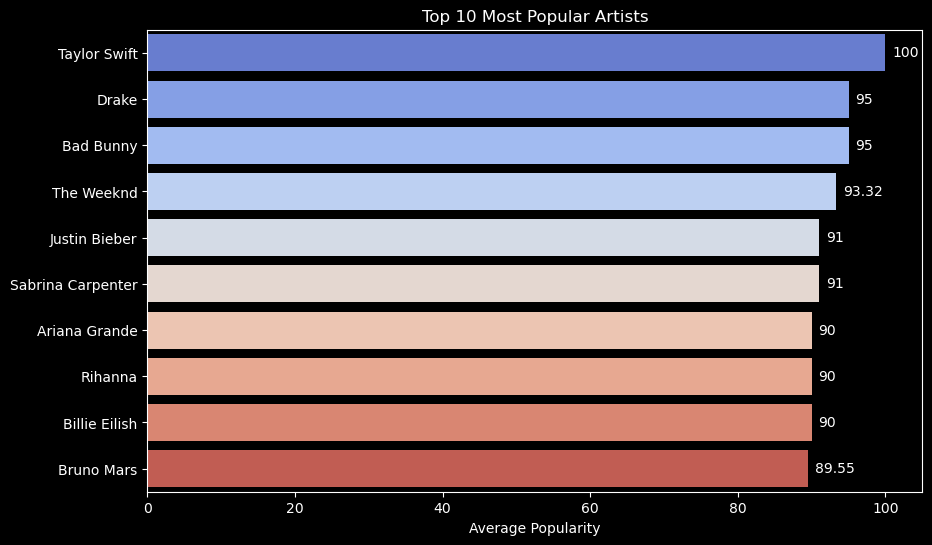

In [589]:
## Visualizing most popular artists
plt.figure(figsize=(10, 6))

cn = sns.barplot(x=most_popular_artist.values, y=most_popular_artist.index, palette='coolwarm', legend=False)
for container in cn.containers:
  cn.bar_label(container,padding=5)
plt.title('Top 10 Most Popular Artists')
plt.ylabel('')
plt.xlabel('Average Popularity')

In [590]:
## Artists who are popular and release most of the songs
artists_by_releases_names=set(artist_with_most_releases.index)
artists_by_popularity_names=set(most_popular_artist.index)
relation_artists=list(artists_by_releases_names.intersection(artists_by_popularity_names))

print("Popular Artists With Most Releases")
print("-" * 35)

for artists in relation_artists:
    print(f"{artists}")

Popular Artists With Most Releases
-----------------------------------
Taylor Swift
Drake
The Weeknd
Ariana Grande


In [591]:
### Artists By Average Track Popularity
artist_track_popularity = data.groupby('artist_name')['track_popularity'].mean().sort_values(ascending=False).head(10)

print("Top 10 artists with popular tracks are:")
print("-" * 40)
print(f"{'artist':<20} {'popularity'}")
print("-" * 40)

for artist, popularity in artist_track_popularity.items():
    print(f"{artist:<20}: {popularity:.2f}")

Top 10 artists with popular tracks are:
----------------------------------------
artist               popularity
----------------------------------------
HUNTR/X             : 93.75
Saja Boys           : 93.50
Disco Lines         : 92.00
Rumi                : 91.00
Olivia Dean         : 90.33
The Police          : 90.00
Djo                 : 89.00
W Sound             : 89.00
KATSEYE             : 88.67
Jin                 : 88.00


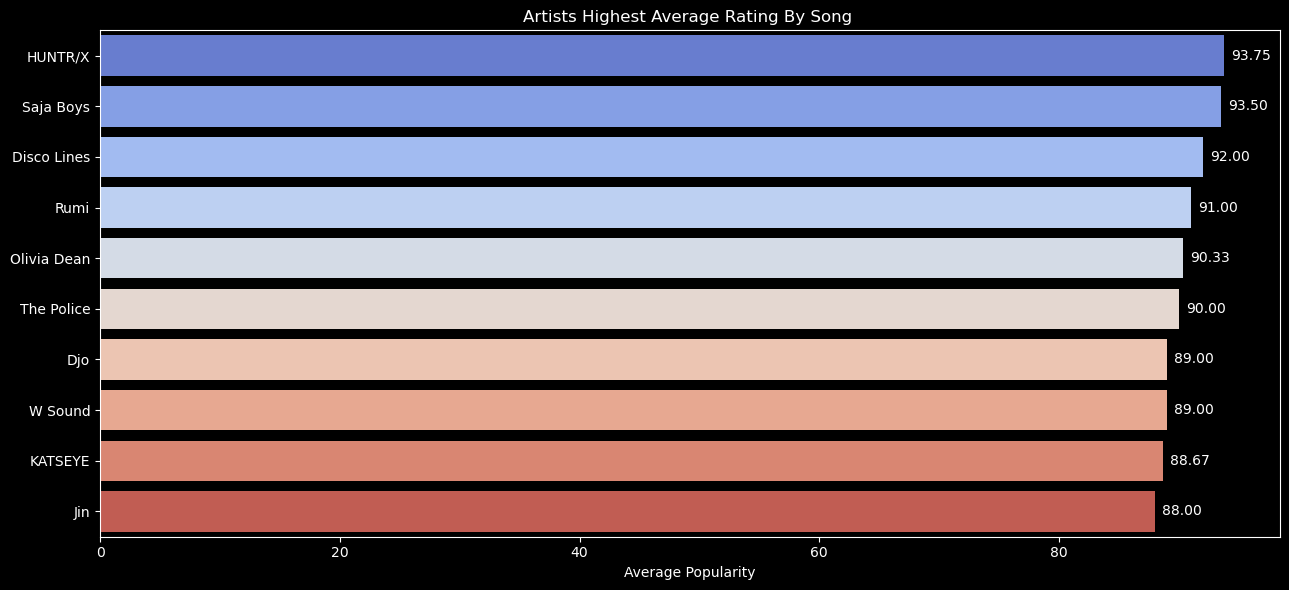

In [592]:
plt.figure(figsize=(13, 6))

cn = sns.barplot(x=artist_track_popularity.values, y=artist_track_popularity.index, palette='coolwarm', legend=False)
for container in cn.containers:
  cn.bar_label(container,fmt='%.2f',padding=5)
plt.title('Artists Highest Average Rating By Song ')
plt.ylabel('')
plt.xlabel('Average Popularity')
plt.tight_layout()

In [593]:
### Most Popular Track
most_popular_songs = data.groupby(['artist_name','track_name'])['track_popularity'].mean().sort_values(ascending=False).head(10)

print("Top 10 Most Popular Songs:")
print("-" * 70)
print(f"{'artist':<20} {'popularity':<35} {'track'}")
print("-" * 70)

for (artist, track), popularity in most_popular_songs.items():
    print(f"{artist:<20} {track:<35} {popularity:.2f}")

Top 10 Most Popular Songs:
----------------------------------------------------------------------
artist               popularity                          track
----------------------------------------------------------------------
HUNTR/X              Golden                              99.00
Taylor Swift         Opalite                             97.00
Olivia Dean          Man I Need                          95.00
Taylor Swift         Elizabeth Taylor                    95.00
Taylor Swift         Father Figure                       94.00
Billie Eilish        BIRDS OF A FEATHER                  94.00
Saja Boys            Soda Pop                            94.00
Taylor Swift         CANCELLED!                          93.00
Taylor Swift         Actually Romantic                   93.00
Taylor Swift         Wood                                93.00


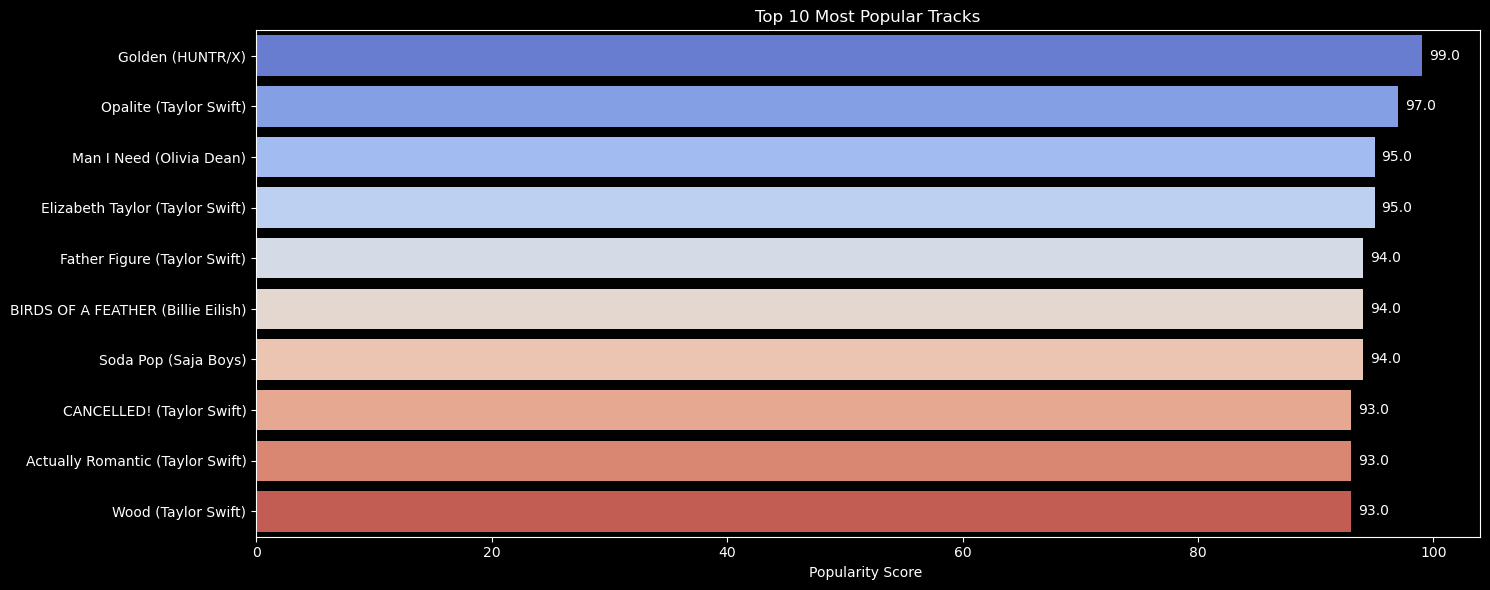

In [594]:
## Giving the rating column a name 
df_plot = most_popular_songs.reset_index(name='popularity')

# Create a combined label so we see "Song Name - Artist" on the chart
df_plot['full_label'] = df_plot['track_name'] + " (" + df_plot['artist_name'] + ")"

plt.figure(figsize=(15, 6))
ax=sns.barplot(data=df_plot, x='popularity', y='full_label',palette='coolwarm')
plt.title('Top 10 Most Popular Tracks')
plt.xlabel('Popularity Score ')
plt.ylabel('')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f',padding=5, fontsize=10)

plt.tight_layout()
plt.show()

## Market Share

In [595]:
total_songs = len(data)

artist_song_counts = data['artist_name'].value_counts()

market_share = (artist_song_counts / total_songs) * 100

print("Top 10 Artists by Market Share (%):")
print('-'*35)
print(f"{'artist':<20} {'market_share'}")
print('-'*35)
for artist, share in market_share.head(10).items():
    print(f"{artist:<20}: {share:.2f}%")

Top 10 Artists by Market Share (%):
-----------------------------------
artist               market_share
-----------------------------------
Taylor Swift        : 3.76%
The Weeknd          : 1.72%
Ariana Grande       : 1.15%
Lana Del Rey        : 1.13%
Nirvana             : 1.04%
Drake               : 0.98%
Post Malone         : 0.95%
The Neighbourhood   : 0.88%
Lady Gaga           : 0.82%
Olivia Rodrigo      : 0.80%


In [596]:
data['is_hit'] = data['track_popularity'] >= 75

artist_stats = data.groupby('artist_name').agg(
    total_releases=('track_name', 'count'),
    total_hits=('is_hit', 'sum')
)

artist_stats['hit_rate'] = (artist_stats['total_hits'] / artist_stats['total_releases']) * 100

consistent_hit_artist = artist_stats[artist_stats['total_releases'] > 10].sort_values(by='hit_rate', ascending=False).head(10)

print("Top 10 Artists with the Highest Hit Rate :")
print('-'*42)
print(f"{'artist':<20}  {'hit_rate'}")
print('-'*42)
for artist , hit_rate in consistent_hit_artist['hit_rate'].items():
    print(f"{artist:<20} : {hit_rate:.2f}")

Top 10 Artists with the Highest Hit Rate :
------------------------------------------
artist                hit_rate
------------------------------------------
Sabrina Carpenter    : 70.27
sombr                : 66.67
Kendrick Lamar       : 61.54
Tame Impala          : 61.54
Bad Bunny            : 53.57
Calvin Harris        : 52.38
Bruno Mars           : 51.61
Flo Rida             : 50.00
TV Girl              : 50.00
Doja Cat             : 50.00


In [564]:
most_released_genre = data['artist_genres'].str.split(', ').explode().value_counts().head()
print("Most released genre".center(30))
print("-"*30)
print(f"{'genre':<15}  {'total_songs'}")
print("-"*30)
for genre,count in most_released_genre.items():
    if genre !='unknown':
        print(f"{genre:<15} : {count}")

     Most released genre      
------------------------------
genre            total_songs
------------------------------
soundtrack      : 451
pop             : 386
rap             : 304
country         : 276


In [597]:
all_genres = data['artist_genres'].str.split(', ').explode()
valid_genres = all_genres[all_genres != 'unknown']

most_released_genre = valid_genres.value_counts().head(5)

print("Most Released Genres".center(30))
print("-" * 30)
print(f"{'Genre':<20} {'Total Songs'}") 
print("-" * 30)

for genre, count in most_released_genre.items():
    print(f"{genre:<20} : {count}")

     Most Released Genres     
------------------------------
Genre                Total Songs
------------------------------
soundtrack           : 451
pop                  : 386
rap                  : 304
country              : 276
rock                 : 270


In [621]:
data['genre_exploded']=data['artist_genres'].str.split(',')
data_exploded=data.explode('genre_exploded')
data_exploded['genre_exploded']=data_exploded['genre_exploded'].str.strip()
genre_stats=data_exploded.groupby('genre_exploded')['track_popularity'].agg(['mean','count'])
top_rated_genres=genre_stats[genre_stats['count']>50].sort_values(by='mean',ascending=False).head(10)
print('Top genre with high rating'.center(50))
print("-"*50)
print(f"{'genre':<25} {'mean':<15} {'count'}")
print("-"*50)

for genre, rows in top_rated_genres.iterrows():
    print(f"{genre:<25} {row['mean']:<15.2f} {row['count']}")

            Top genre with high rating            
--------------------------------------------------
genre                     mean            count
--------------------------------------------------
trap latino               63.21           62.0
urbano latino             63.21           62.0
reggaeton                 63.21           62.0
indie                     63.21           62.0
latin                     63.21           62.0
k-pop                     63.21           62.0
alternative metal         63.21           62.0
old school hip hop        63.21           62.0
rap metal                 63.21           62.0
art rock                  63.21           62.0


Text(0, 0.5, '')

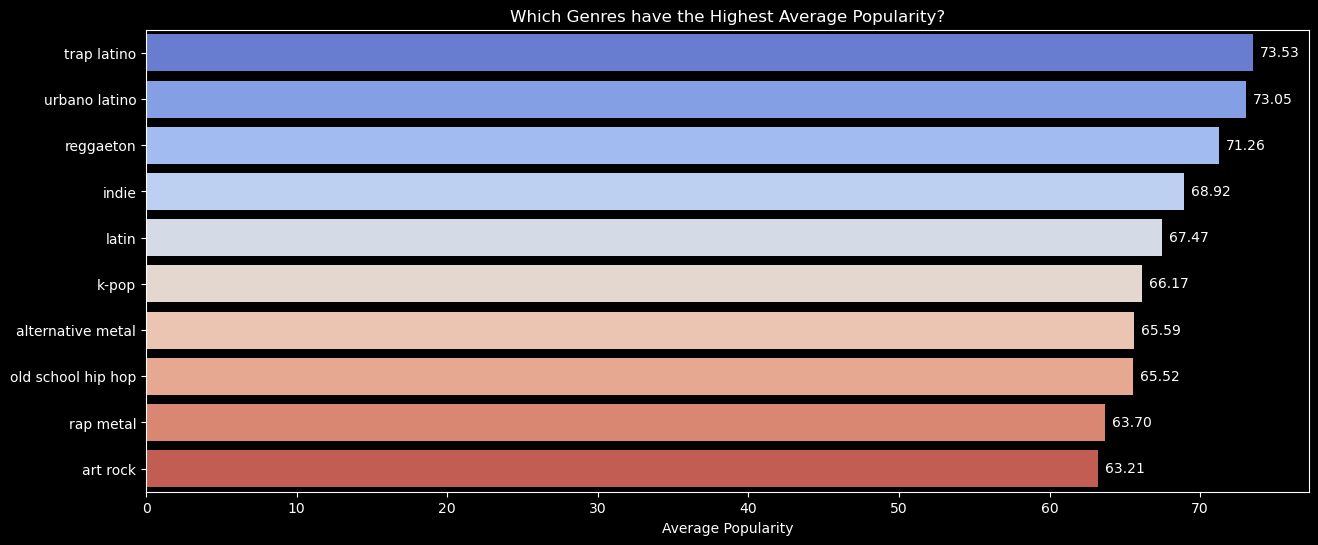

In [622]:
# Plot
plt.figure(figsize=(15, 6))
cn=sns.barplot(x=top_rated_genres['mean'], y=top_rated_genres.index, palette='coolwarm')
for container in cn.containers:
    cn.bar_label(container,fmt='%.2f',padding=5)
plt.title('Which Genres have the Highest Average Popularity?')
plt.xlabel('Average Popularity')
plt.ylabel('')


## Analyzing explicit songs

In [584]:
explicit_count = data['explicit'].value_counts()
print("Explicitness".center(30))
print("-"*30)
print(f"{'Type':<15}  {'total_songs'}")
print("-"*30)
for explicit,count in explicit_count.items():
    print(f"{explicit:<15} : {count}")

         Explicitness         
------------------------------
Type             total_songs
------------------------------
0               : 6582
1               : 2190


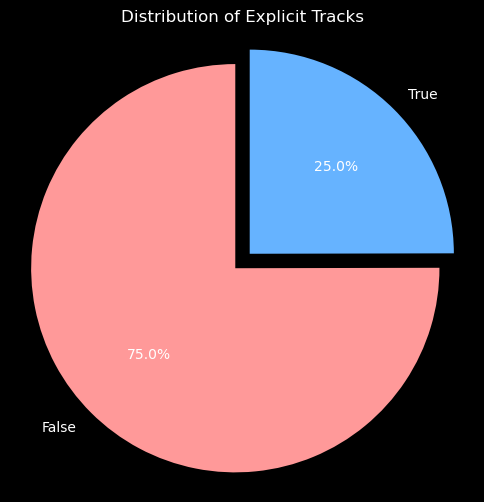

In [570]:
plt.figure(figsize=(6, 6))
explode=(0.1,0)
## Used baby pink color for non explicit songs and light blue for explicit
plt.pie(explicit_count.values, labels=explicit_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'],explode=explode)
plt.title('Distribution of Explicit Tracks')
plt.axis('equal')
plt.show()

In [571]:
avg_popularity_by_explicit = data.groupby('explicit')['track_popularity'].mean()

print("Average Popularity by Explicitness:")
print("-" * 35)

for status, score in avg_popularity_by_explicit.items():
    print(f"{status:<15} : {score:.2f}")

Average Popularity by Explicitness:
-----------------------------------
0               : 50.48
1               : 57.53


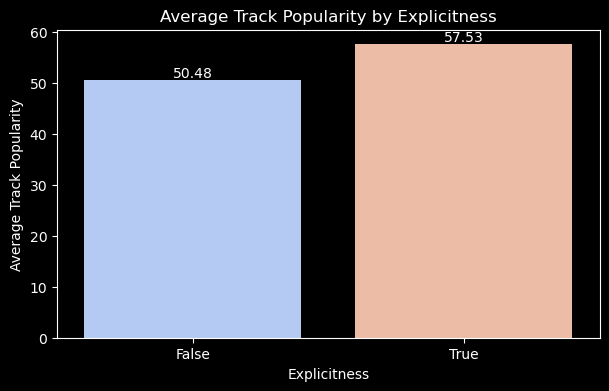

In [572]:
plt.figure(figsize=(7, 4))
cn=sns.barplot(x=avg_popularity_by_explicit.index, y=avg_popularity_by_explicit.values.round(2), palette='coolwarm')
cn.bar_label(cn.containers[0])
cn.bar_label(cn.containers[1])
plt.title('Average Track Popularity by Explicitness')
plt.xlabel('Explicitness')
plt.ylabel('Average Track Popularity')
plt.show()

In [573]:
explicit_artists=data[data['explicit'] == 'Explicit'].groupby('artist_name').size().sort_values(ascending=False).head(5)
print("Top 10 Explicit Artists".center(30))
print("-"*30)
print(f"{'Artist':<15}  {'Songs'}")
print("-"*30)
for artist,count in explicit_artists.items():

    print(f"{artist:<15} : {count}")

   Top 10 Explicit Artists    
------------------------------
Artist           Songs
------------------------------


## Analyzing Album Types

In [574]:
album_type_counts = data['album_type'].value_counts()
print("Album Type".center(30))
print("-"*30)
print(f"{'album':<15}  {'releases'}")
print("-"*30)
for album,count in album_type_counts.items():
    print(f"{album:<15} : {count}")

          Album Type          
------------------------------
album            releases
------------------------------
album           : 6020
single          : 2244
compilation     : 508


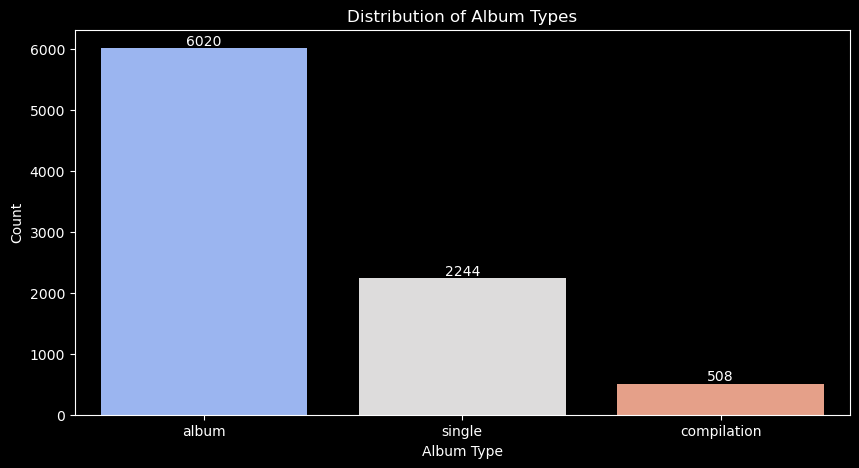

In [575]:
plt.figure(figsize=(10, 5))
cn = sns.barplot(x=album_type_counts.index, y=album_type_counts.values, palette='coolwarm')
plt.title('Distribution of Album Types')
plt.xlabel('Album Type')
plt.ylabel('Count')
for container in cn.containers:
  cn.bar_label(container)
plt.show()

In [576]:
avg_popularity_by_album_type = data.groupby('album_type')['track_popularity'].mean()
print("Album Popularity".center(30))
print("-"*30)
print(f"{'album':<15}  {'popularity'}")
print("-"*30)
for album,popularity in avg_popularity_by_album_type.items():
    print(f"{album:<15} : {popularity:.2f}")

       Album Popularity       
------------------------------
album            popularity
------------------------------
album           : 55.53
compilation     : 40.51
single          : 46.09


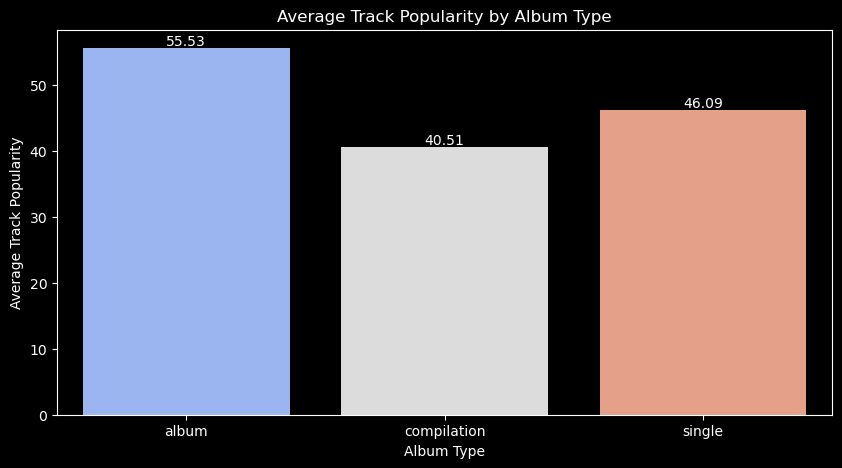

In [577]:
plt.figure(figsize=(10, 5))
cn = sns.barplot(x=avg_popularity_by_album_type.index, y=avg_popularity_by_album_type.values.round(2), 
                 hue=avg_popularity_by_album_type.index, palette='coolwarm', legend=False)
plt.title('Average Track Popularity by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Average Track Popularity')
for container in cn.containers:
  cn.bar_label(container)
plt.show()

## Analyzing Track Duration


Text(0, 0.5, 'Total Songs')

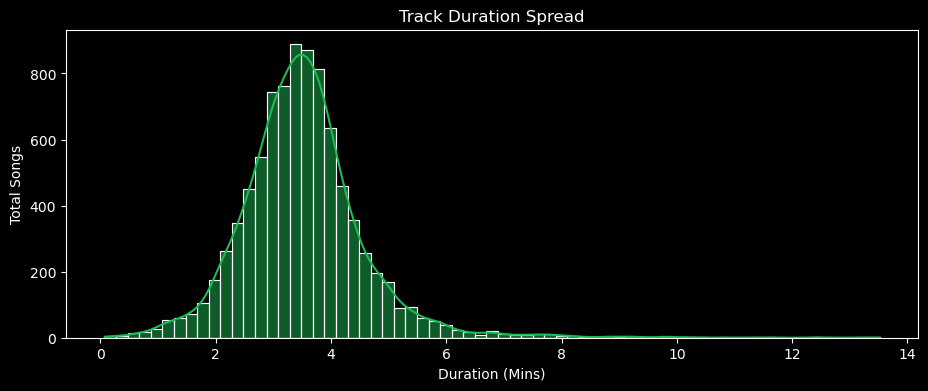

In [578]:
plt.figure(figsize=(11,4))
sns.histplot(x=data['duration_min'],color='#1DB954',kde='0.8',bins=140,binwidth=0.2)
plt.title('Track Duration Spread')
plt.xlabel('Duration (Mins)')
plt.ylabel('Total Songs')

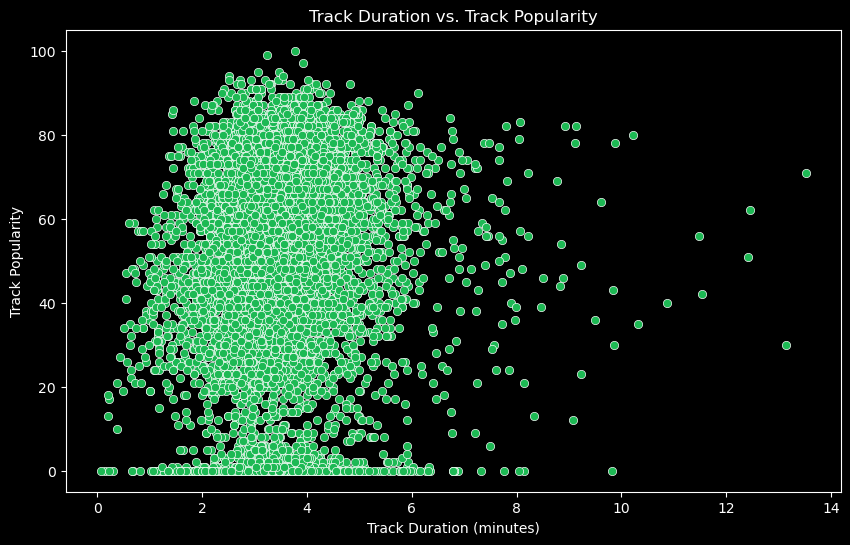

In [579]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.scatterplot(x='duration_min', y='track_popularity', data=data, color='#1DB954')
plt.title('Track Duration vs. Track Popularity')
plt.xlabel('Track Duration (minutes)')
plt.ylabel('Track Popularity')
plt.show()

## Time Series Analysis

In [580]:
data['release_year']=data['album_release_date'].dt.year

Text(0.5, 1.0, 'Song Releases By Year')

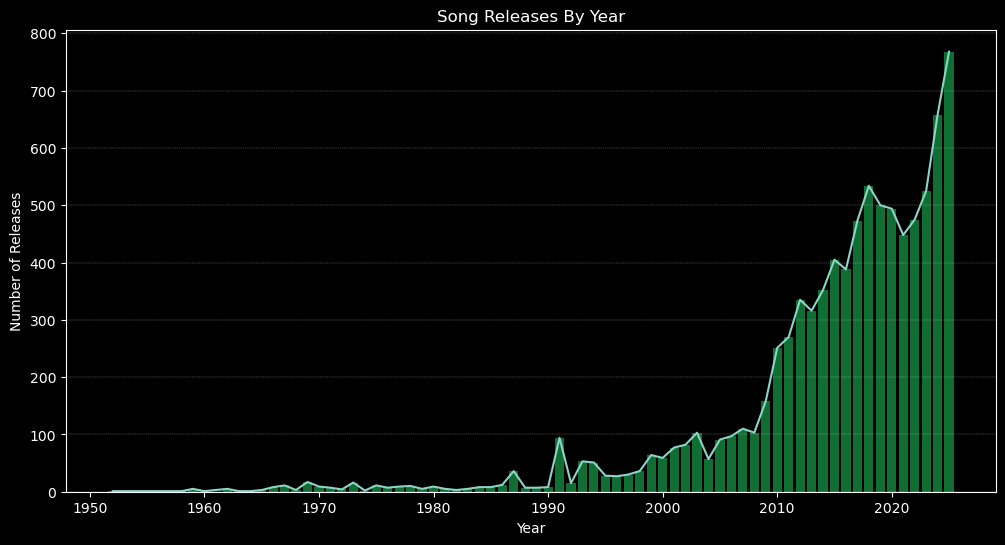

In [581]:
releases_by_year = data['release_year'].value_counts().sort_index()

# 2. Average Popularity per Year
popularity_by_year = data.groupby('release_year')['track_popularity'].mean()

plt.figure(figsize=(12, 6))
ax=plt.bar(releases_by_year.index, releases_by_year.values, color='#1DB954', alpha=0.6, label='Number of Releases')
plt.plot(releases_by_year)
plt.grid(alpha=0.5,axis='y',linestyle='--', linewidth=0.3)
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Song Releases By Year')

Text(0.5, 1.0, 'Average Popularity By Year')

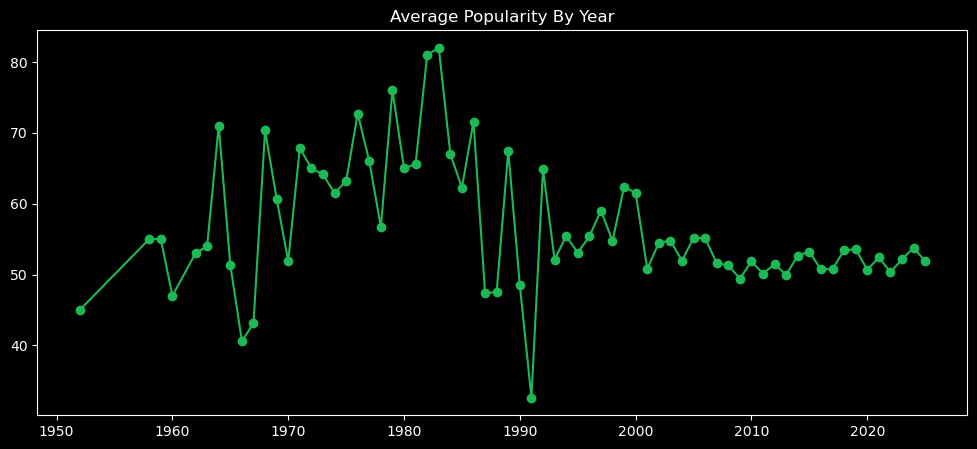

In [582]:
plt.figure(figsize=(12,5))
plt.style.use('dark_background')
# ax.set_xlabel('', color='white')
avg_popularity_by_year.plot(color='#1DB954',marker='o')
plt.xlabel('')
plt.title('Average Popularity By Year')


Text(0.5, 1.0, 'Average Popularity By Year')

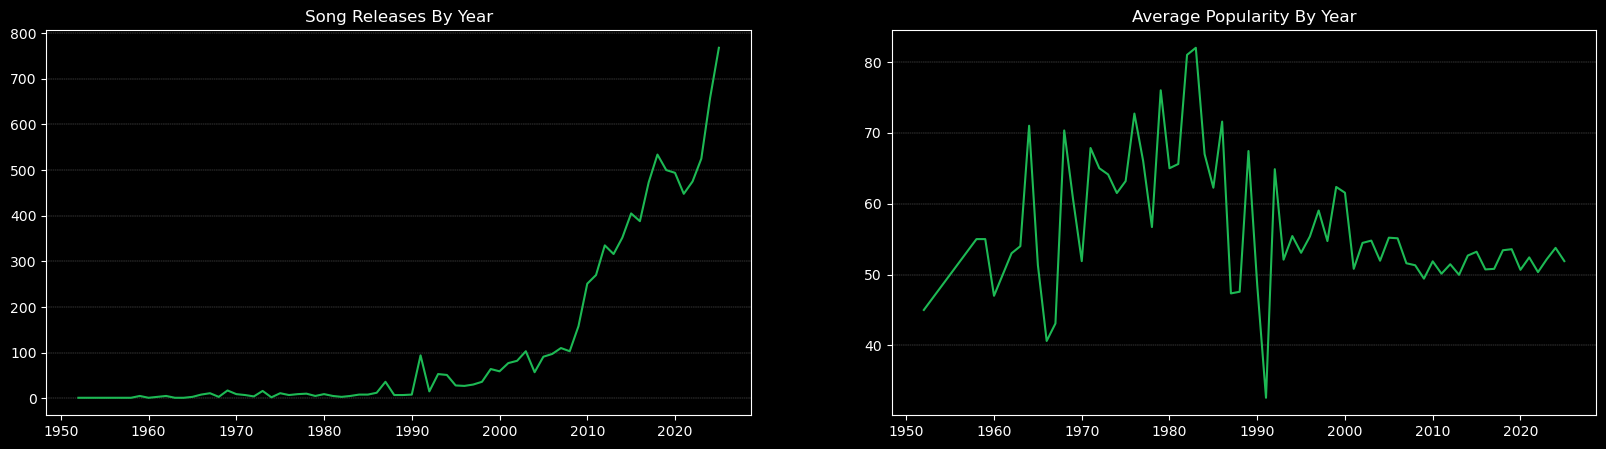

In [583]:
releases_by_year=data.groupby('release_year')['track_id'].size()

## Subplots
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.style.use('dark_background')
releases_by_year.plot(color='#1DB954')
plt.xlabel('')
plt.grid(alpha=0.5,axis='y',linestyle='--', linewidth=0.3)
plt.title('Song Releases By Year')


plt.subplot(1,2,2)
plt.style.use('dark_background')
# ax.set_xlabel('', color='white')
avg_popularity_by_year.plot(color='#1DB954')
plt.xlabel('')
plt.grid(alpha=0.5,axis='y',linestyle='--', linewidth=0.3)
plt.title('Average Popularity By Year')


## Key Observations from Spotify Data Analysis

-   **Artist with Most Releases**: `Taylor Swift` leads with `324 releases`, followed by `The Weeknd (141)`, `Lana Del Rey (99)`, `Ariana Grande (94), and Nirvana (91)`. <br>

-   **Most Popular Artists (Average Popularity)**: `Taylor Swift` also tops the list with a perfect average popularity score of `100.00`. Other highly popular artists include `Bad Bunny (95.00)`, `Drake (95.00` `The Weeknd (93.33`), and `Sabrina Carpenter (91.00)`.
-   **Common Artists in Top Releases and Popularity**: `Taylor Swift`, `The Weeknd`, and `Ariana Grande `consistently appear in both the top artists by number of releases and by average popularity, indicating their significant presence and influence.
-   **Artist Market Share**: `Taylor Swift` commands the largest market share with `3.78%` of the total songs, followed by `The Weeknd (1.64%)`, `Lana Del Rey (1.15%)`, `Ariana Grande (1.10%)`, and `Nirvana (1.06%)`.
-   **Most Released Genre**: While 'No Genre' accounts for the largest count due to missing data imputation, 'pop' (920), 'country' (680), 'soundtrack' (450), and 'hip hop' (431) are the most frequently occurring genres.
-   **Missing Data Handled**: Missing values in `artist_name (0.03%)` were imputed as 'Unknown Artist', and `artist_genres (39.16%)` as 'No Genre', ensuring a complete dataset for analysis.
-   **Date Conversion**: The `album_release_date` column was successfully converted to datetime objects, enabling time-based analyses.
-   **Explicit Track Analysis**: `Explicit` tracks make up `25.03%` of the dataset. Interestingly, `'Explicit'` songs have a higher average popularity `(57.82)` compared to `'Non-Explicit'` songs `(50.53)`, suggesting a **correlation between explicitness and track popularity**.
-   **Top Explicit Artists**: Drake (73), The Weeknd (70), Eminem (66), Post Malone (59), and Lil Peep (59) are the artists with the highest number of explicit song releases.
-   **Album Type Distribution**: The majority of releases are 'album' (5856), followed by 'single' (2219), and 'compilation' (507).
-   **Album Popularity**: 'Album' type releases exhibit the highest average track popularity (55.66), followed by 'single' (46.36) and 'compilation' (40.51).
-   **Track Duration vs. Popularity**: The scatter plot revealed that there appears to be an optimal range for track duration, with most popular tracks falling between 2 and 5 minutes. Extremely short or long tracks tend to have lower popularity.